# Cân bằng lược đồ ảnh xám

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '.\\img\\face01.jpg'
im = Image.open(path).convert('L')
arr = np.array(im)
arr.shape, arr.dtype

((457, 800), dtype('uint8'))

# Step 1: count the occurences of each value

In [3]:
count, bin_edges = np.histogram(arr, bins=256, range=(0,256))  
# trả về 2 mảng
# range: có 256 bins, thì cạnh bên trái của bin đầu = 0 và cạnh bên phải của bin cuối = 256
# mỗi bin chứa giá trị [a, b), VD bin cuối chỉ chứa giá trị [255, 256)
# density: represents a probability density function rather than just raw counts of the number of elements in each bin

count.shape, bin_edges.shape
# 7 đến 254 gồm 248 giá trị thì đếm số lần xuất hiện của 248 giá trị đó
# 248 bins thì có 249 cạnh đr còn gì !!!

((256,), (257,))

# Step 2: cumulative distribution function (CDF)

In [4]:
# Calculate the cumulative distribution function (CDF) : F(x) = P(X <= x) 

# Cumulative sum of counts
cs = count.cumsum()

# P(X <= x)
cdf = cs / cs[-1]  # cs[-1] is the total sum of counts of all values <= 255

# Scaling to the range of [0, 255] to fit the pixel values of an image
normalized_cdf = 255 * cdf
normalized_cdf.shape, np.round(normalized_cdf)

((256,),
 array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   2.,   2.,   2.,   2.,   2.,   2.,
          2.,   2.,   2.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   4.,
          4.,   4.,   4.,   4.,   4.,   5.,   5.,   5.,   5.,   5.,   6.,
          6.,   6.,   6.,   7.,   7.,   7.,   7.,   8.,   8.,   8.,   8.,
          9.,   9.,   9.,  10.,  10.,  10.,  11.,  11.,  11.,  12.,  12.,
         12.,  13.,  13.,  13.,  14.,  14.,  14.,  15.,  15.,  15.,  16.,
         16.,  17.,  17.,  17.,  18.,  18.,  18.,  19.,  19.,  19.,  20.,
         20.,  20.,  21.,  21.,  22.,  22.,  22.,  23.,  23.,  23.,  24.,
         24.,  24.,  25.,  25.,  26.,  26.,  26.,  27.,  27.,  27.,  28.,
         28.,  28.,  29.,  29

# Step 3: interpolation

In [5]:
equalized_arr = np.interp(arr, bin_edges[:-1], normalized_cdf)  # k lấy số cuối 256
equalized_arr.shape, equalized_arr

((457, 800),
 array([[141.36736871, 153.4463895 , 153.4463895 , ..., 240.59347648,
         240.59347648, 215.13811543],
        [153.4463895 , 153.4463895 , 153.4463895 , ..., 240.59347648,
         240.59347648, 196.64573304],
        [153.4463895 , 141.36736871, 141.36736871, ..., 254.19370897,
         254.19370897, 240.59347648],
        ...,
        [118.59801696, 118.59801696, 113.97160832, ..., 166.81575492,
         166.81575492, 161.54835886],
        [124.48896335, 124.48896335, 124.48896335, ..., 166.81575492,
         166.81575492, 161.54835886],
        [131.58655635, 131.58655635, 131.58655635, ..., 166.81575492,
         166.81575492, 161.54835886]]))

# Step 4: equalized image

In [6]:
equalized_im = Image.fromarray(equalized_arr.astype('uint8'))

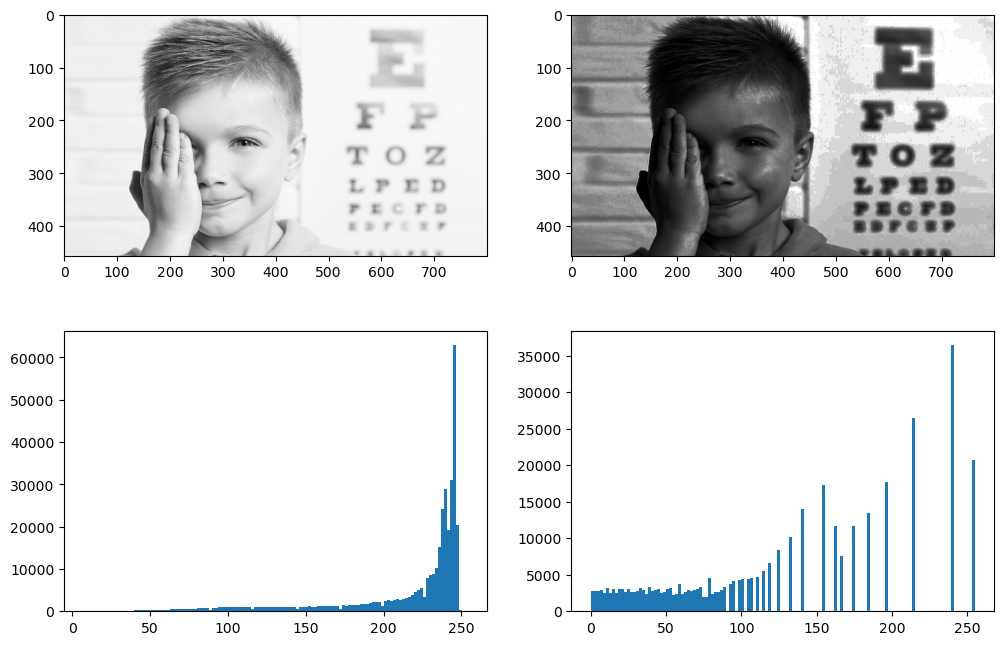

In [7]:
fig, subs = plt.subplots(2, 2, figsize=(12,8))

sub1, sub2, sub3, sub4 = subs.flatten()

sub1.imshow(im, cmap='gray')
sub3.hist(arr.flatten(), bins=128)
sub2.imshow(equalized_im, cmap='gray')
sub4.hist(equalized_arr.flatten(), bins=128)

plt.show()